<a href="https://colab.research.google.com/github/elisagl/Curso_phyton/blob/main/costo_intercambiadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mealpy==2.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 17.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
import numpy as np
from mealpy.swarm_based.GWO import GWO_WOA

In [4]:
#Cargar base de datos
df = pd.read_csv("data_intercambiadores1.csv")

In [5]:
# Seleccionar variables de entrada y variables de salida
X_datos = df.drop("COSTO", axis=1)
Y_datos = df["COSTO"]
print(X_datos)
print(Y_datos)

        DC     DT     PT   TLYT      NP    CB    DBC  DBIF     DSB     DTB  \
0    0.588  20.60  0.493  0.734  0.1920  2.34  0.249  1.42  0.0767  0.0344   
1    0.840   6.68  0.360  2.010  0.0573  1.89  0.480  1.08  0.0177  0.0578   
2    0.760   2.88  0.236  2.880  0.0754  2.23  0.362  1.27  0.0660  0.0773   
3    0.663  16.50  0.315  2.420  2.3500  2.64  0.498  1.13  0.0137  0.0482   
4    0.813   4.48  0.792  2.560  0.7330  2.36  0.247  1.29  0.0852  0.0325   
..     ...    ...    ...    ...     ...   ...    ...   ...     ...     ...   
638  0.743  17.40  0.936  2.470  1.5700  2.36  0.221  1.42  0.0404  0.0721   
639  0.921  14.80  0.583  0.786  2.4500  3.52  0.210  1.40  0.0660  0.0500   
640  0.554  13.70  0.522  0.371  2.7800  2.76  0.404  1.19  0.0962  0.0387   
641  0.833   7.11  0.411  2.060  1.1200  1.22  0.470  1.57  0.0994  0.0250   
642  0.620  13.80  0.639  1.780  1.8600  3.30  0.399  1.60  0.0602  0.0873   

      DOTL  
0    0.824  
1    0.880  
2    0.924  
3    0.833 

In [6]:
#Dividir la información entre los datos de entrenamiento y los datos de prueba
X_entreno, X_prueba, Y_entreno, Y_prueba = train_test_split(X_datos, Y_datos, test_size=0.3, random_state=30)

In [7]:
#Pre-procesamiento de datos para escalar valores
escalador = StandardScaler()
escalador.fit(X_entreno)
X_entreno_escalado = escalador.transform(X_entreno)
X_prueba_escalado = escalador.transform(X_prueba)

print(X_entreno_escalado)
print(X_prueba_escalado)

[[ 1.37596951 -0.19937562  0.81820233 ...  1.19141987 -0.94675311
   0.39659405]
 [ 1.36063932 -0.48823385 -0.52983709 ... -0.46642383 -1.75679644
  -0.48467027]
 [-0.49431338  1.09376877  0.90807163 ...  0.39719707  1.04044679
  -1.11737286]
 ...
 [-0.70382595  0.97621019  0.35807154 ... -0.03846883  1.49534797
  -1.11737286]
 [-0.32057126  1.22812144 -0.52624232 ... -1.36474379 -0.47988084
  -0.84621461]
 [ 0.11889412 -0.30014012 -1.75313793 ...  1.23768528  1.10429257
   1.27785838]]
[[ 1.21755757  0.42200545 -0.77428157 ... -0.1965423  -0.17661339
   1.18747229]
 [ 0.69122113  1.12735694 -0.78866066 ... -1.61149262  0.74516006
   0.14803232]
 [-0.22348007  0.53956403  1.01232001 ... -0.53196649 -1.46949043
  -1.52411024]
 ...
 [-0.20814988  0.43879953  0.43715652 ...  0.1851473   1.29183955
   1.32305142]
 [-1.75649883 -1.70244606  1.23519586 ... -0.55509919  0.04684684
   1.14227925]
 [ 0.79853244  0.25406462  0.24303885 ...  1.53069951 -0.55569771
  -0.57505635]]


In [10]:
from keras.engine import sequential 
# Definir el modelo de la Red Neuronal
modelo =Sequential()
modelo.add(Dense(30, input_dim=11))
modelo.add(Dense(10, activation="relu"))
modelo.add(Dense(10, activation="relu"))
modelo.add(Dense(10, activation="relu"))

#Definir la capa de salida 
modelo.add(Dense(1, activation="relu"))
modelo.compile(loss="mean_squared_error", optimizer="Adam", metrics=["mae"])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                960       
                                                                 
 dense_6 (Dense)             (None, 10)                810       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
12/12 [==============================] - 1s 20ms/step - loss: 30661651988480.0000 - mae: 5115055.5000 - val_loss: 25736398241792.0000 - val_mae: 4638333.0000
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 30661649891328.0000 - mae: 5115055.5000 - val_loss: 25736391950336.0000 - val_mae: 4638332.5000
Epoch 3/1000
12/12 [==============================] - 0s 5ms/step - loss: 30661645697024.0000 - mae: 5115054.5000 - val_loss: 25736389853184.0000 - val_mae: 4638332.5000
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 30661643599872.0000 - mae: 5115054.5000 - val_loss: 25736385658880.0000 - val_mae: 4638331.5000
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 30661631016960.0000 - mae: 5115054.0000 - val_loss: 25736375173120.0000 - val_mae: 4638331.0000
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 30661618434048.0000 - mae: 5115052.0000 - val_loss: 25736364687360.0000 - v

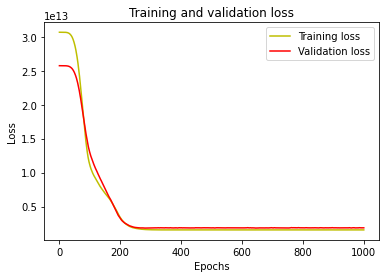

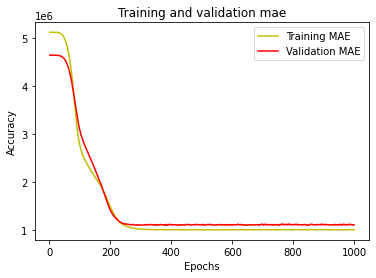

In [11]:
history = modelo.fit(X_entreno_escalado, Y_entreno, validation_split=0.2, epochs=1000)
import matplotlib.pyplot as plt
#Código para graficar
loss = history.history ['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', Label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
#Predecir valores
predicciones = modelo.predict(X_prueba_escalado[:5])
print("La predicción de valores es: ", predicciones)
print("Los valores reales son: ", Y_prueba[:5])

1/1 [==============================] - 0s 126ms/step
La predicción de valores es:  [[5764320. ]
 [6530153.5]
 [2750254.5]
 [2876947. ]
 [2717071.2]]
Los valores reales son:  67     5360000.0
256    5400000.0
356    2490000.0
487    4260000.0
611    2220000.0
Name: COSTO, dtype: float64


In [20]:
def fobj(x):
  return modelo.predict(np.asarray(x).reshape(1,11))[0,0]

dict_sthe = {
    "fit_func": fobj, 
    "lb": [0.3, 1, 0, 0, 0, 0, 0.2, 1, 0.01, 0.01, 0.8],
    "ub": [1, 21, 1, 3, 4, 0.55, 1.6, 0.1, 0.1, 0.1, 0.95],
    "minmax": "sin"
}

iteraciones = 30
pop_size = 30
model = GWO_WOA(iteraciones, pop_size)
mejor_solucion, mejor_evaluacion = model.solve(dict_sthe)
print("La mejor solución encontrada es: ", mejor_solucion)
print("El costo del equipo para la mejor solución encontrada es: ", mejor_evaluacion)

1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:Solving single objective optimization problem.


1/1 [==============================] - 0s 18ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 1, Current best: 5007474.5, Global best: 5007474.5, Runtime: 1.87642 seconds


1/1 [==============================] - 0s 26ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 2, Current best: 5013448.5, Global best: 5013448.5, Runtime: 1.91522 seconds


1/1 [==============================] - 0s 18ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 3, Current best: 5084243.0, Global best: 5084243.0, Runtime: 1.89472 seconds


1/1 [==============================] - 0s 18ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 4, Current best: 5150052.5, Global best: 5150052.5, Runtime: 1.88941 seconds


1/1 [==============================] - 0s 18ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 5, Current best: 5170476.5, Global best: 5170476.5, Runtime: 1.89293 seconds


1/1 [==============================] - 0s 18ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 6, Current best: 5207713.0, Global best: 5207713.0, Runtime: 1.85483 seconds


1/1 [==============================] - 0s 17ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 7, Current best: 5282669.0, Global best: 5282669.0, Runtime: 1.81165 seconds


1/1 [==============================] - 0s 19ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 8, Current best: 5301425.0, Global best: 5301425.0, Runtime: 1.87311 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 9, Current best: 5401400.0, Global best: 5401400.0, Runtime: 1.79966 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 10, Current best: 5435496.0, Global best: 5435496.0, Runtime: 1.88395 seconds


1/1 [==============================] - 0s 25ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 11, Current best: 5458888.5, Global best: 5458888.5, Runtime: 1.78636 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 12, Current best: 5458888.5, Global best: 5458888.5, Runtime: 1.86294 seconds


1/1 [==============================] - 0s 18ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 13, Current best: 5462646.5, Global best: 5462646.5, Runtime: 1.79849 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 14, Current best: 5487687.0, Global best: 5487687.0, Runtime: 1.77194 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 15, Current best: 5487687.0, Global best: 5487687.0, Runtime: 1.82819 seconds


1/1 [==============================] - 0s 17ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 16, Current best: 5487687.0, Global best: 5487687.0, Runtime: 2.30661 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 17, Current best: 5500202.5, Global best: 5500202.5, Runtime: 1.86990 seconds


1/1 [==============================] - 0s 26ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 18, Current best: 5500202.5, Global best: 5500202.5, Runtime: 1.87176 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 19, Current best: 5500202.5, Global best: 5500202.5, Runtime: 1.88398 seconds


1/1 [==============================] - 0s 18ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 20, Current best: 5500202.5, Global best: 5500202.5, Runtime: 1.87185 seconds


1/1 [==============================] - 0s 18ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 21, Current best: 5500202.5, Global best: 5500202.5, Runtime: 1.81512 seconds


1/1 [==============================] - 0s 18ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 22, Current best: 5500202.5, Global best: 5500202.5, Runtime: 1.87713 seconds


1/1 [==============================] - 0s 19ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 23, Current best: 5500202.5, Global best: 5500202.5, Runtime: 1.86574 seconds


1/1 [==============================] - 0s 26ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 24, Current best: 5500915.5, Global best: 5500915.5, Runtime: 1.88200 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 25, Current best: 5501749.5, Global best: 5501749.5, Runtime: 1.89134 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 26, Current best: 5501749.5, Global best: 5501749.5, Runtime: 1.92617 seconds


1/1 [==============================] - 0s 17ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 27, Current best: 5501749.5, Global best: 5501749.5, Runtime: 1.87764 seconds


1/1 [==============================] - 0s 19ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 28, Current best: 5501749.5, Global best: 5501749.5, Runtime: 1.99668 seconds


1/1 [==============================] - 0s 19ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 29, Current best: 5501749.5, Global best: 5501749.5, Runtime: 1.86312 seconds


1/1 [==============================] - 0s 19ms/step


INFO:mealpy.swarm_based.GWO.GWO_WOA:>Problem: P, Epoch: 30, Current best: 5501749.5, Global best: 5501749.5, Runtime: 1.95335 seconds


La mejor solución encontrada es:  [3.57276528e-01 2.10000000e+01 1.10512590e-03 3.30413988e-02
 8.95653841e-03 3.51862306e-02 2.59438167e-01 1.00000000e-01
 3.55519379e-02 4.01824625e-02 9.50000000e-01]
El costo del equipo para la mejor solución encontrada es:  5501749.5
